<font size="5"><center> **Exercise 1.1** </center></font>
<font size="4"><center> CS-673 <br> Introduction to Deep Generative Models </center></font>
<font size="4"><center> Sifakis Emmanouil, *1288* </center></font>

---

↓ Imports ↓

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.integrate import quad
from sympy import symbols, integrate, sqrt, exp, solve

seed = 198
np.random.seed(seed)

⇒ Question b

$\boxed{ \{y_i = g(x_i) : x_i \sim \text{Exp}(0.5)\}_{i=1}^n }$, with n = 100, 1000, 10000 .


Plot in the same figure and compare the estimated histogram with
$\boxed{f_Y(y) = \lambda e^{-\lambda \sqrt{y}} \cdot \frac{1}{2} y^{-1/2}}$

In [2]:
# PDF with the analytically computed formula, shown above (or question 1.a of the pdf)
def f_Y(y_values, lmbda):
    return lmbda * np.exp(-lmbda * np.sqrt(y_values)) * 0.5 * ((y_values) ** (-0.5))

def g(x):
    return np.power(x, 2)

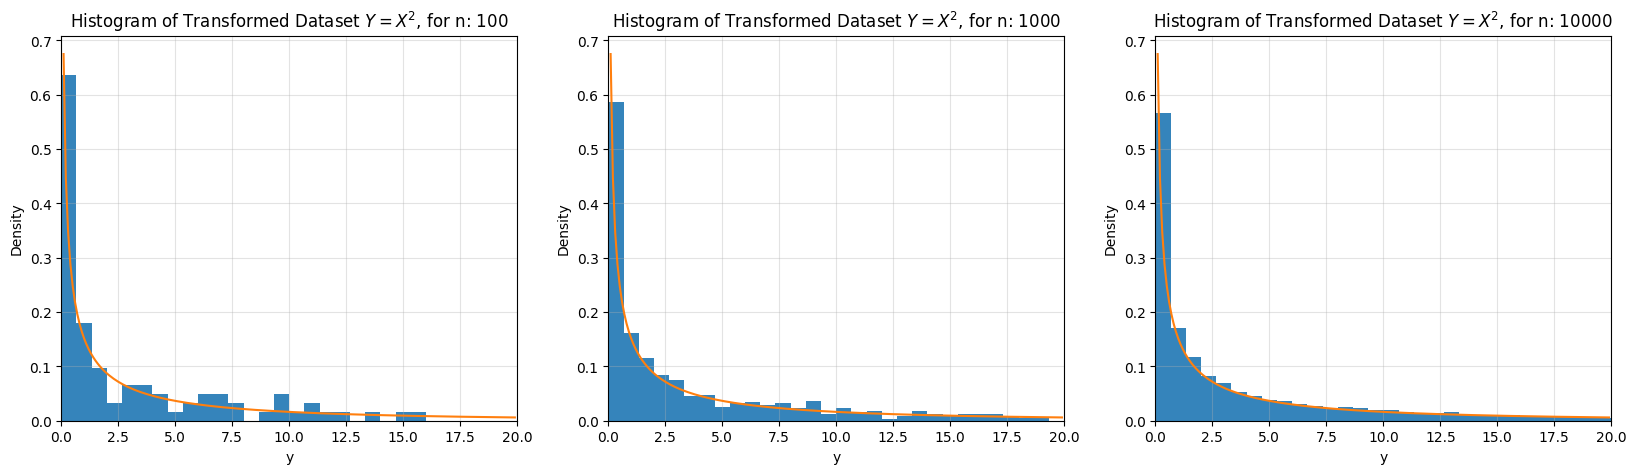

In [3]:
# Initialize Parameters
lmd = 0.5
n_values = [100, 1000, 10000]
bins = 30
xmin = 0
xmax = 20

# y_range starts from 0.1 to not having division by zero warning
y_range = np.arange(xmin + 0.1, xmax, 0.1)

i = 0
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for n in n_values:
  # HISTOGRAM
  x = np.random.exponential(scale=1 / lmd, size=n)
  y = g(x)
  ax[i].hist(y, bins=bins, range=(xmin, xmax), alpha=0.9, label=f'n={n}', density=True)
  # PDF of Y
  ax[i].plot(y_range, f_Y(y_range, lmd), label='f_Y(y)')
  ax[i].set_xlim([0, xmax])
  ax[i].grid(alpha = 0.35)

  ax[i].set_xlabel('y')
  ax[i].set_ylabel('Density')
  ax[i].set_title(r'Histogram of Transformed Dataset $Y = X^2$, for n: {}'.format(n))

  i += 1

plt.show()

As it can be observed, from the above subplots, the histogram tends to fit better inside the PDF plot graph as the sample size (n) increases. This is because the histograms for larger (n) values tend to better approximate the underlying distributions (in our case the one described by the PDF). This 'convergence' occurs because larger sample sizes result in a more accurate representation of the underlying distribution, leading to a tighter fit between the estimated distribution (represented by the histogram) and the theoretical distribution (represented by the PDF).


⇒ Question c

Repeat question b using the dataset $\boxed{\{y_i = F_Y^{-1}(u_i) : u_i \sim U(0, 1)\}_{i=1}^n}$  where $\boxed{F_Y(y) = \int_{-\infty}^{y} f_Y(z) \, dz }$ is the CDF.


You are allowed to use the function `integrate()` of SymPy Python library for the estimation of the indefinite integral.

# SOS
THE FOLLOWING IS THE CODE USING THE ADVICED LIBRARY
NEEDS >5m TO RUN AND I DELETED THE OUTPUT BEFORE SENDING THE RESULTS
(THAT IS WHY I INCLUDED THE BELOW ESTIMATION WAY WITH SCIPY LIBRARY)

(for some reason the histogram appears to be shifted to the right)

In [ ]:
# Define symbols
t, y, lmd = symbols('t y lmd')

# Integrand function definition
def integrand(t, lmd, y):
  return lmd * exp(-lmd * sqrt(y*t)) * 0.5 * (y**(-0.5))

# Indefinite integral of the PDF of Y using SymPy's integrate
def int_f_Y(y_value):
  return integrate(integrand(t, lmd, y_value), (t, 0, np.inf))

# Inverse CDF function using the result of the indefinite integral
def inverse_CDF_Y(u):
    return int_f_Y(u)

# Function to generate samples for a given n
def generate_samples(n):
    u_values = uniform.rvs(size=n)
    y = np.array([inverse_CDF_Y(u) for u in u_values])
    return y

In [ ]:
# Initialize parameters
lmd = 0.5
n_values = n_values = [100, 1000, 10000]
bins = 30
xmin = 0
xmax = 20

# y_range starts from 0.1 to not have division by zero warning
y_range = np.arange(xmin + 0.1, xmax, 0.01)
graph_pdf = lmd * np.exp(-lmd * np.sqrt(y_range)) * 0.5 * (y_range**(-0.5))
# Plot histograms for different n values
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, n in enumerate(n_values):
    y_samples = generate_samples(n)
    ax[i].hist(y_samples, bins=bins, range=(xmin, xmax), alpha=0.9, label=f'n={n}', density=True)
    # ax[i].plot(y_range, graph_pdf, label='Graph PDF')
    # ax[i].set_xlim([0, xmax])
    ax[i].grid(alpha=0.35)
    ax[i].set_xlabel('y')
    ax[i].set_ylabel('Density')
    ax[i].set_title(r'Histogram of Transformed Dataset $Y = X^2$, for n: {}'.format(n))

plt.legend()
plt.show()


scipy

In [4]:
# Integrand function definition
def integrand(t, lmd, y):
  return lmd * np.exp(-lmd * np.sqrt(y*t)) * 0.5 * (y**(-0.5))

# Indefinite integral of the PDF of Y (quad)
def int_f_Y(y_value):
  return quad(integrand, 0, np.inf, args=(lmd, y_value), full_output=1)[0]

# Inverse CDF function using the result of the indefinite integral
def inverse_CDF_Y(u):
  return int_f_Y(u)

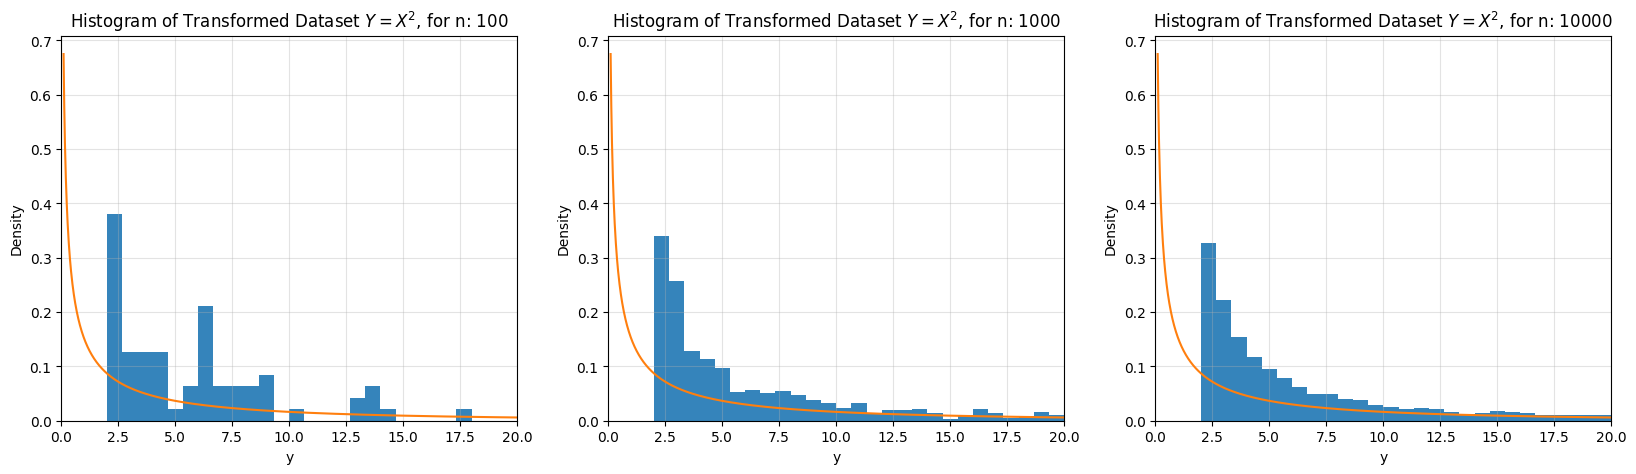

In [6]:
# Initialize parameters
lmd = 0.5
n_values = [100, 1000, 10000]
bins = 30
xmin = 0
xmax = 20

# y_range starts from 0.1 to not having division by zero warning
y_range = np.arange(xmin + 0.1, xmax, 0.01)
graph_pdf = lmd * np.exp(-lmd * np.sqrt(y_range)) * 0.5 * (y_range**(-0.5))

i = 0
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for n in n_values:
  # HISTOGRAM
  u_values = uniform.rvs(size=n)
  y = np.array([inverse_CDF_Y(u) for u in u_values])
  ax[i].hist(y, bins=bins, range=(xmin, xmax), alpha=0.9, label=f'n={n}', density=True)
  ax[i].plot(y_range, graph_pdf, label='Graph PDF')
  ax[i].set_xlim([0, xmax])
  ax[i].grid(alpha = 0.35)

  ax[i].set_xlabel('y')
  ax[i].set_ylabel('Density')
  ax[i].set_title(r'Histogram of Transformed Dataset $Y = X^2$, for n: {}'.format(n))

  i += 1

plt.show()